<a href="https://colab.research.google.com/github/E2r44/Foundations-of-Data-Science-ITBLs/blob/main/Activity2_Esraa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [364]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [365]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [366]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [367]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [368]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [369]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-369-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [370]:
#merged_data.dtypes

In [371]:
pollution_data = merged_data[['pm10','neighborhood']]

In [372]:
pollution_data.shape[0]

118495

In [373]:
merged_data.rename(columns={'neighborhood1': 'neighborhood'}, inplace=True)

In [374]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [375]:
pollution_data['pm10'].max()

87341.71

what is the minimum pm10 value

In [376]:
pollution_data['pm10'].min()

0.0

In [377]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [378]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [379]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [380]:
#Task 1.1 - Display the first 5 rows of the joined_table using .show().
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [381]:
#Task 1.2 - Print the number of rows and columns in the table.

print(f"Number of rows:{joined_table.num_rows}")

Number of rows:118495


In [382]:
print(f"Number of columns:{joined_table.num_columns}")

Number of columns:2


In [383]:
#Task 1.3 - Identify any missing values in the table
joined_table.where('pm10', are.equal_to(None)).num_rows

0

In [384]:
joined_table.where('neighborhood', are.equal_to(None)).num_rows

0

In [385]:
# Remove rows where 'pm10' or 'neighborhood' contain missing values
# Since the previous checks showed 0 missing values, this step is unnecessary

joined_table = joined_table.where('pm10', are.not_equal_to(None)).where("neighborhood", are.not_equal_to(None))
print(f"Number of rows after cleaning: {joined_table.num_rows}")
joined_table

Number of rows after cleaning: 118495


pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park
0.73,Bronx Park
1.22,Bronx Park
5.82,Bronx Park
11.04,Bronx Park
1.29,Bronx Park


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

1- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().

2- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().

- Display the results in a new table.

In [386]:
# Select relevant columns from merged_data
pollution_data = merged_data[['temperature', 'humidity', 'pm25', 'borough']]

# Convert DataFrame to a Table format for further operations
new_table = Table().from_df(pollution_data)
new_table.show(5)

temperature,humidity,pm25,borough
16.3,15.2,5.91,Bronx
16.2,15.1,1.18,Bronx
16.1,15.1,0.76,Bronx
16.1,15.2,4.48,Bronx
16,15.2,5.77,Bronx


In [387]:
# Task 2.1-Compute summary statistics (Mean, Median, Min, Max) for temperature, humidity, and PM2.5

summary_stats_table = Table().with_columns(
    "Statistic",make_array("Mean", "Median", "Min", "Max"),
    "Temperature", [np.mean(new_table.column("temperature")), np.median(new_table.column("temperature")),
                    np.min(new_table.column("temperature")), np.max(new_table.column("temperature"))],
    "Humidity", [np.mean(new_table.column("humidity")), np.median(new_table.column("humidity")),
                 np.min(new_table.column("humidity")), np.max(new_table.column("humidity"))],
    "PM25", [np.mean(new_table.column("pm25")), np.median(new_table.column("pm25")),
             np.min(new_table.column("pm25")), np.max(new_table.column("pm25"))]
)

summary_stats_table.show()


Statistic,Temperature,Humidity,PM25
Mean,8.24158,50.1549,7.37452
Median,7.2,46.2,3.02
Min,-7.9,0,0
Max,10471,104.2,3267.02


In [388]:
# Display the column names of the merged dataset to check available attributes
merged_data.columns

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm1', 'pm25', 'pm10', 'geometry', 'index_right', 'neighborhood',
       'boroughCode', 'borough', '@id'],
      dtype='object')

In [389]:
# Extract the 'pm25' and 'borough' columns from the merged dataset
Pm25_data = merged_data[['pm25','borough']]
# Convert the extracted data from a Pandas DataFrame to a Table format
joinedPM25_table = Table().from_df(Pm25_data)

In [390]:
# Task 2.2- Group the data by borough and calculate the average PM2.5 level for each borough

borough_pm25_avg = joinedPM25_table.group("borough", np.average)

borough_pm25_avg.show()

borough,pm25 average
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

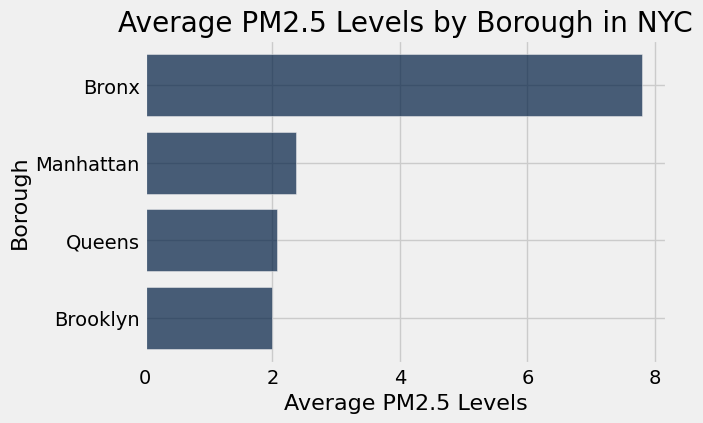

In [391]:
#Task 3.1 - Create a horizontal bar chart to visualize the average PM2.5 levels per borough

# Sort the data by "pm25 average" in descending order
borough_pm25_avg = borough_pm25_avg.sort("pm25 average", descending=True)

# Create a horizontal bar chart with sorted data
borough_pm25_avg.barh("borough", "pm25 average")

plt.xlabel("Average PM2.5 Levels")
plt.ylabel("Borough")

plt.title("Average PM2.5 Levels by Borough in NYC")

plt.show()


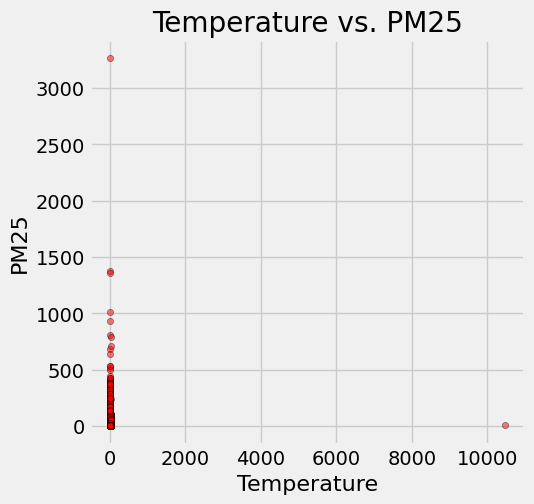

In [392]:
#Task 3.2 - Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.

Pm25_temp = merged_data[['pm25','temperature']]
joinedTemp_table = Table().from_df(Pm25_temp)

joinedTemp_table.scatter("temperature", "pm25", alpha=0.5, color="red", edgecolors="black")
plt.xlabel("Temperature")
plt.ylabel("PM25")
plt.title("Temperature vs. PM25")
plt.show()



In [393]:
print(f"Temperature Min: {min(joinedTemp_table.column('temperature'))}")
print(f"Temperature Max: {max(joinedTemp_table.column('temperature'))}")

print(f"PM25 Min: {min(joinedTemp_table.column('pm25'))}")
print(f"PM25 Max: {max(joinedTemp_table.column('pm25'))}")


Temperature Min: -7.9
Temperature Max: 10471.0
PM25 Min: 0.0
PM25 Max: 3267.02


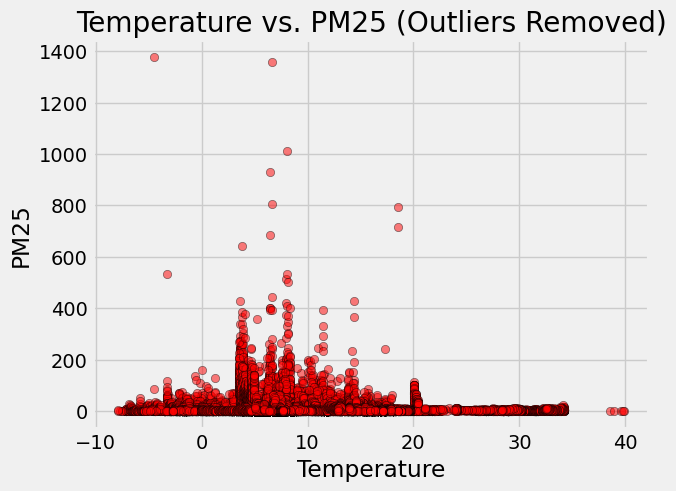

In [394]:
# Remove outliers
filtered_pm25_table = joinedTemp_table.where("temperature", are.below(1000))
filtered_pm25_table = filtered_pm25_table.where("pm25", are.below(2000))

# Extract cleaned temperature and PM25 data
temperature_cleaned = filtered_pm25_table.column("temperature")
pm25_cleaned = filtered_pm25_table.column("pm25")


plt.scatter(temperature_cleaned, pm25_cleaned, alpha=0.5, color="red", edgecolors="black")
plt.xlabel("Temperature")
plt.ylabel("PM25")
plt.title("Temperature vs. PM25 (Outliers Removed)")
plt.show()

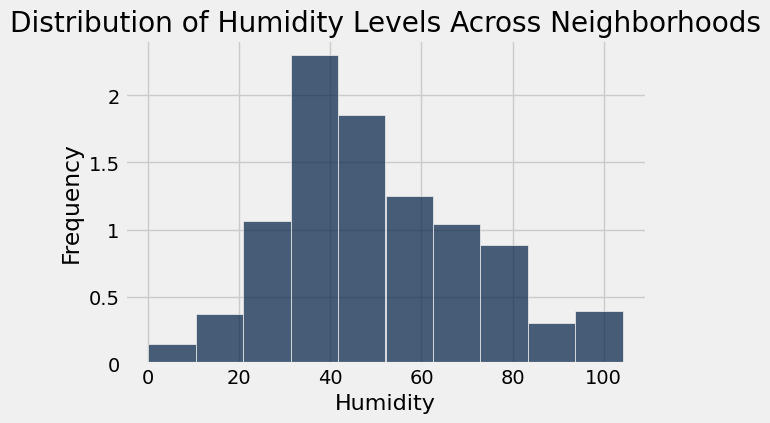

In [395]:
#Task 3.3 - Create a histogram of humidity values across all neighborhoods using .hist().

humidity_stats = merged_data[['humidity']]
humidity_table = Table().from_df(humidity_stats)

humidity_table.hist("humidity", bins=10)
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Distribution of Humidity Levels Across Neighborhoods")
plt.show()


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [396]:
# Task 4.1 - Function to categorize PM2.5 levels
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif 12 <= pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"

In [397]:
# Task 4.2- Apply function to categorize PM2.5 levels

# Convert merged_data (Pandas DataFrame) into a Table format
all_data = Table().from_df(merged_data)

# Apply the PM2.5 categorization function to the "pm25" column and create a new column "PM25_Category"
all_data = all_data.with_column(
    "PM25_Category", all_data.apply(calculate_pm25_category, "pm25")
)

all_data.show(5)

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood,boroughCode,borough,@id,PM25_Category
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,POINT (-73.870094 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,POINT (-73.870094 40.847179),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good


In [398]:
# Tas k4.3- Count the number of sensors in each PM2.5 category
pm25_category_counts = all_data.group("PM25_Category")
pm25_category_counts.show()

PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [403]:
#Task 5.1 - Randomly sample 10% of the rows from the table without replacement using .sample().

PM25_data = new_table.select("pm25")

# Determine 10% of total rows
sample_size = int(PM25_data.num_rows * 0.10)

print(f"Sample Size (10% of rows): {sample_size}")

# Take a random sample without replacement
sampled_data = PM25_data.sample(sample_size, with_replacement=False)



Sample Size (10% of rows): 11849


In [404]:
#Task 5.2 - Calculate the mean pm25 level for the sampled data
sample_mean_pm25 = np.mean(sampled_data.column("pm25"))

print(f"Sample Mean PM2.5: {sample_mean_pm25}")


Sample Mean PM2.5: 7.382297240273441


In [405]:
#Task 5.3 - Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.

# List to store mean pm25 values from each sample
sample_means = []


# Perform 100 random samples and compute mean using np.random.choice
for i in range(100):
    sample = np.random.choice(PM25_data.column("pm25"), size=sample_size, replace=False)  # Random sample without replacement
    mean_pm25 = np.mean(sample)  # Compute mean of the sample
    sample_means = np.append(sample_means, mean_pm25)


print("First 10 sample means:",sample_means[:10])

print(f"Total number of sample means collected: {len(sample_means)}") # Should print 100

First 10 sample means: [ 7.25627732  7.43152418  7.43399359  7.28520803  7.31053169  7.38368892
  7.40654654  7.49045573  7.15056123  7.3978302 ]
Total number of sample means collected: 100


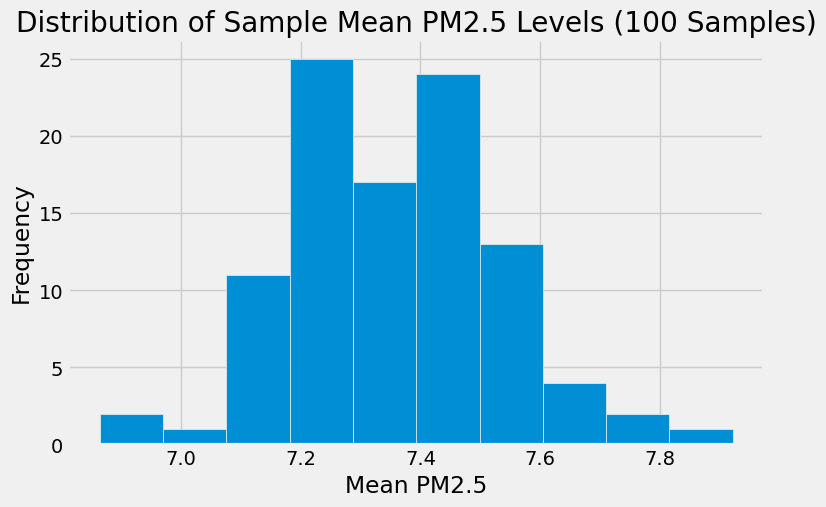

In [406]:
# Task 5.4 - Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
plt.hist(sample_means, bins=10)

plt.xlabel("Mean PM2.5")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Mean PM2.5 Levels (100 Samples)")
plt.show()

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.